In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
datedf = pd.read_csv('/content/9_Tekra.csv')
X_d = datedf.drop(columns='DO')
X_d = X_d.drop(columns='Temp')
X_d

,Date
0,31-05-1990
1,10-06-1990
2,20-06-1990
3,01-07-1990
4,20-07-1990
...,...
593,02-07-2017
594,31-07-2017
595,03-09-2017
596,02-10-2017


In [3]:
X_d['Date'] = pd.to_datetime(X_d['Date'], format='%d-%m-%Y')
X_d.set_index('Date', inplace=True)  # Set 'Date' column as index

In [4]:
import pandas as pd
df_sum = pd.DataFrame()
for i in range(1, 10):
    preds = pd.read_csv(f'/content/{i}_preds.csv')
    if i == 1:
        df_sum = preds
    else:
        df_sum += preds

df_sum


,DO
0,7.668413
1,8.242050
2,7.969002
3,8.220056
4,9.045778
...,...
571,9.332475
572,8.380381
573,10.251887
574,8.102585


In [5]:
preds = df_sum.values

In [6]:
true = pd.read_csv('/content/true.csv')

In [7]:
true = true['DO'].values

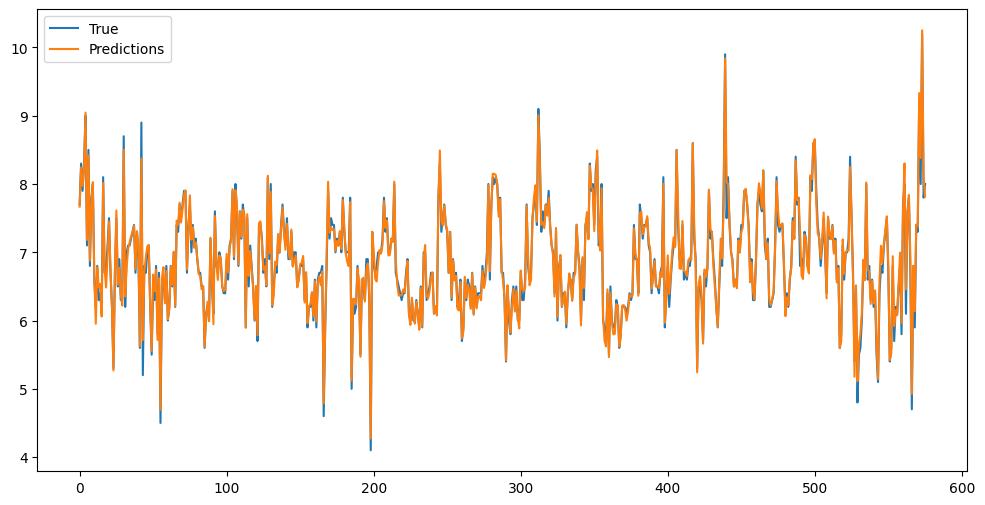

In [8]:
plt.figure(figsize=(12,6))
plt.plot(true, label='True')
plt.plot(preds, label='Predictions')
plt.legend()
plt.show()


In [9]:
true = np.array(true)
preds = np.array(preds)
true = true.reshape(preds.shape[0],1)
preds = preds.reshape(preds.shape[0],1)

In [10]:
wall1 = 457
wall2 = 555

In [11]:
true = true.flatten().tolist()
preds = preds.flatten().tolist()

In [12]:
r = np.corrcoef(true[:wall1], preds[:wall1])[0, 1]
r_squared = r ** 2
a1 = np.array(true[:wall1], dtype=int)
a2 = np.array(preds[:wall1], dtype=int)
denominator = np.sum((a1 - np.mean(a1)) ** 2)
numerator = np.sum((a2 - a1) ** 2)
nse_val = 1 - numerator / denominator
nse_val
print(f"r: {r}")
print(f"r squared: {r_squared}")
print(f"nse: {nse_val}")

r: 0.9910894565543185
r squared: 0.9822583108931343
nse: 0.876600273198005


In [13]:
r = np.corrcoef(true[wall1:wall2], preds[wall1:wall2])[0, 1]
r_squared = r ** 2
a1 = np.array(true[wall1:wall2], dtype=int)
a2 = np.array(preds[wall1:wall2], dtype=int)
denominator = np.sum((a1 - np.mean(a1)) ** 2)
numerator = np.sum((a2 - a1) ** 2)
nse_val = 1 - numerator / denominator
nse_val
print(f"r: {r}")
print(f"r squared: {r_squared}")
print(f"nse: {nse_val}")

r: 0.9894784588866917
r squared: 0.9790676206007825
nse: 0.8657329882782767


In [14]:
r = np.corrcoef(true[wall2:], preds[wall2:])[0, 1]
r_squared = r ** 2
a1 = np.array(true[wall2:], dtype=int)
a2 = np.array(preds[wall2:], dtype=int)
denominator = np.sum((a1 - np.mean(a1)) ** 2)
numerator = np.sum((a2 - a1) ** 2)
nse_val = 1 - numerator / denominator
nse_val
print(f"r: {r}")
print(f"r squared: {r_squared}")
print(f"nse: {nse_val}")

r: 0.991758378160549
r squared: 0.9835846806516425
nse: 0.9216417910447762


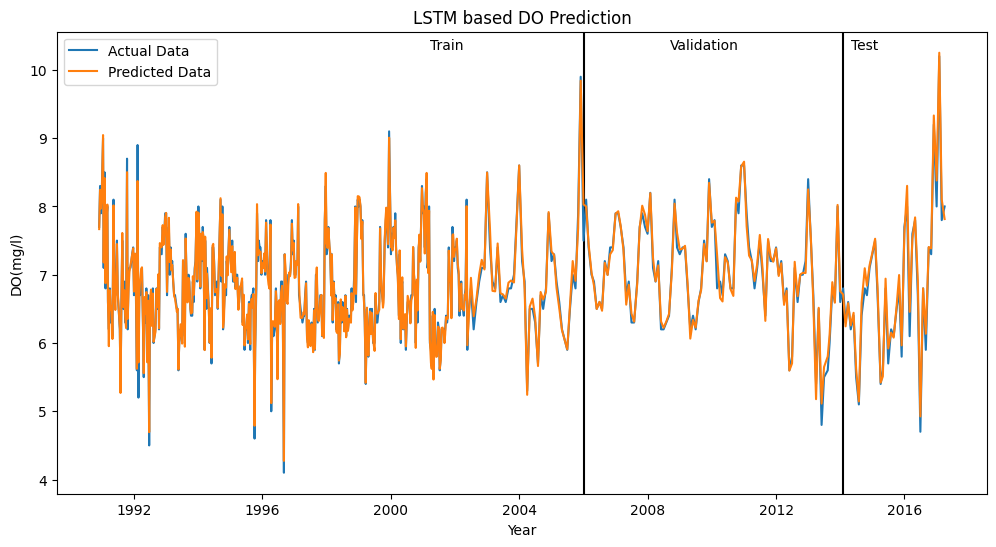

In [15]:

plt.figure(figsize=(12,6)) #plotting
plt.axvline(x=X_d[X_d.index.year == 2006].iloc[0].name, c='black', linestyle='-')
plt.axvline(x=X_d[X_d.index.year == 2014].iloc[0].name, c='black', linestyle='-')

plt.annotate('Train', xy=(X_d.index[390], max(true) + 0.1), color='black', fontsize=10, ha='center')
plt.annotate('Validation', xy=(X_d.index[500], max(true) + 0.1), color='black', fontsize=10, ha='center')
plt.annotate('Test', xy=(X_d.index[560], max(true) + 0.1), color='black', fontsize=10, ha='center')

colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#9467bd']

plt.plot(X_d.index[15:X_d.shape[0]-7],true, label='Actual Data')  # actual plot
plt.plot(X_d.index[15:X_d.shape[0]-7],preds, label='Predicted Data')
plt.title('LSTM based DO Prediction')
plt.xlabel('Year')  # Add x-axis label
plt.ylabel('DO(mg/l)')  # Add y-axis label
plt.legend()
plt.savefig("whole_plot.png", dpi=1200)
plt.show()